In [1]:
from google.colab import files
uploaded = files.upload()

Saving MLP_with_MNIST_dataset.ipynb to MLP_with_MNIST_dataset.ipynb


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [8]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2107 - loss: 2.2710 - val_accuracy: 0.4534 - val_loss: 1.7603
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4916 - loss: 1.6996 - val_accuracy: 0.5499 - val_loss: 1.5810
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5363 - loss: 1.5836 - val_accuracy: 0.5502 - val_loss: 1.5386
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5527 - loss: 1.5263 - val_accuracy: 0.5815 - val_loss: 1.4765
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5689 - loss: 1.4873 - val_accuracy: 0.6033 - val_loss: 1.4302
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5867 - loss: 1.4503 - val_accuracy: 0.6178 - val_loss: 1.3991
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6000 - loss: 1.4150 - val_accuracy: 0.6278 - val_loss: 1.3646
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6142 - loss: 1.3897 - val_accuracy: 0

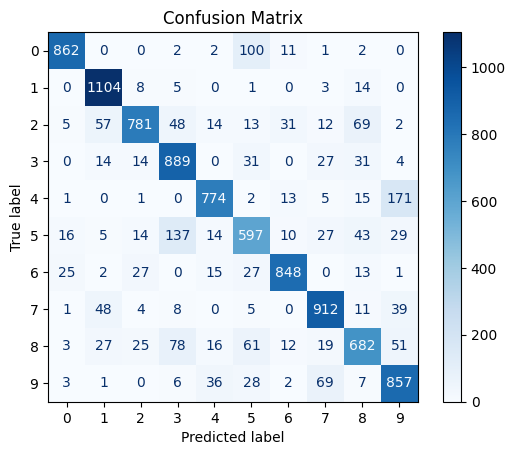

In [9]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile model with optimizer and loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with increased epochs and batch size tuning
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Predict test labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()